5000


Edges: {('GATGG', 'ATGGT'): 8, ('TGATG', 'GATGG'): 8, ('GGATG', 'GATGG'): 8, ('AGATG', 'GATGG'): 8, ('CGATG', 'GATGG'): 8, ('ATGGT', 'TGGTG'): 8, ('TATGG', 'ATGGT'): 8, ('AATGG', 'ATGGT'): 8, ('CATGG', 'ATGGT'): 8, ('TGGTG', 'GGTGT'): 8, ('TTGGT', 'TGGTG'): 8, ('CTGGT', 'TGGTG'): 8, ('GTGGT', 'TGGTG'): 8, ('GGTGT', 'GTGTT'): 8, ('AGGTG', 'GGTGT'): 8, ('GGGTG', 'GGTGT'): 8, ('CGGTG', 'GGTGT'): 8, ('GTGTT', 'TGTTT'): 8, ('TGTGT', 'GTGTT'): 8, ('AGTGT', 'GTGTT'): 8, ('CGTGT', 'GTGTT'): 8, ('TGTTT', 'GTTTA'): 8, ('CTGTT', 'TGTTT'): 8, ('TTGTT', 'TGTTT'): 8, ('ATGTT', 'TGTTT'): 8, ('GTTTA', 'TTTAT'): 8, ('AGTTT', 'GTTTA'): 8, ('GGTTT', 'GTTTA'): 8, ('CGTTT', 'GTTTA'): 8, ('TTTAT', 'TTATT'): 8, ('ATTTA', 'TTTAT'): 8, ('CTTTA', 'TTTAT'): 8, ('TTTTA', 'TTTAT'): 8, ('TTATT', 'TATTT'): 8, ('CTTAT', 'TTATT'): 8, ('GTTAT', 'TTATT'): 8, ('ATTAT', 'TTATT'): 8, ('TATTT', 'ATTTT'): 8, ('ATATT', 'TATTT'): 8, ('CTATT', 'TATTT'): 8, ('GTATT', 'TATTT'): 8, ('ATTTT', 'TTTTG'): 8, ('GATTT', 'ATTTT'): 8, ('A

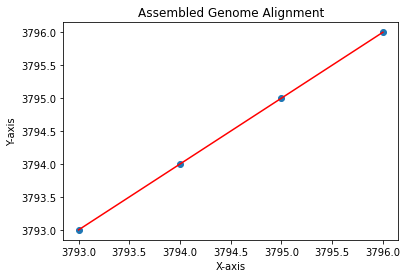

{'ATAAT': [],
 'GTAAA': [],
 'CCATA': [],
 'CACGC': [],
 'TCGTC': [],
 'GTCGA': [],
 'ACCCT': [],
 'GATAG': [],
 'TTTTT': [],
 'CGATA': [],
 'GATGC': [],
 'GTAAG': [],
 'GAAAC': [],
 'TTCCG': [],
 'TGAAG': [],
 'CACAA': [],
 'GAGTC': [],
 'AATCG': [],
 'GGAGT': [],
 'ACCCG': [],
 'ACGAA': [],
 'TGTGG': [],
 'TACGC': [],
 'GGCTA': [],
 'TGCAC': [],
 'TCTAT': [],
 'CATGG': [],
 'GGGCC': [],
 'AGGGC': [],
 'CATCG': [],
 'TGCAA': [],
 'CCGGC': [],
 'CTTGG': [],
 'ACTCC': [],
 'CGTTT': [],
 'ACGCG': [],
 'CTGAC': [],
 'ACGAT': [],
 'TCAGC': [],
 'CACGA': [],
 'ATCAT': [],
 'AAGCT': [],
 'AATCC': [],
 'AGTTT': [],
 'TGATC': [],
 'GGGAT': [],
 'ACGGG': [],
 'CCCCT': [],
 'GAATG': [],
 'TGGCT': [],
 'GACAA': [],
 'GTGCA': [],
 'TACCT': [],
 'ACTGT': [],
 'GTCCG': [],
 'TGCGC': [],
 'CATTC': [],
 'TTGTT': [],
 'TGTCC': [],
 'GCAGG': [],
 'CAGCA': [],
 'GCAAG': [],
 'CTAGC': [],
 'CGGTC': [],
 'GAGTT': [],
 'CAAGG': [],
 'CCGGG': [],
 'GGGTG': [],
 'AGACC': [],
 'GTCAG': [],
 'ACACA': [],
 'TCAT

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="1000.0px" viewBox="0 0 1000.0 1000.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tfc587a714dcb4739a3acdd8226501ed4"> <path d="M 303.2745477153799 516.0427461584968 Q 351.478760057192 462.23715128664423 421.3

In [5]:
import random
import toyplot
from Bio import pairwise2
import matplotlib.pyplot as plt
import csv
import sys



def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}
    
    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]
        
        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]
        
        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue
        
        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1
    
    return kmers




def get_debruijn_edges_from_kmers(kmers):
    edges = {}
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                if k1[1:] == k2[:-1]:
                    edge = (k1[:-1], k2[:-1])
                    if edge in edges:
                        edges[edge] += 1  # Update edge multiplicity
                    else:
                        edges[edge] = 1
                if k1[:-1] == k2[1:]:
                    edge = (k2[:-1], k1[:-1])
                    if edge in edges:
                        edges[edge] += 1  # Update edge multiplicity
                    else:
                        edges[edge] = 1
    return edges



def plot_debruijn_graph(edges, width=500, height=500):
    "returns a toyplot graph from an input of edges"
    white_background = {"background-color": "white"}
    graph = toyplot.graph(
        [i[0] for i in edges],
        [i[1] for i in edges],
        width=width,
        height=height,
        tmarker=">", 
        vsize=25,
        vstyle={"stroke": "blue", "stroke-width": .5 , "fill": "none"},
        vlstyle={"font-size": "11px"},
        estyle={"stroke": "orange", "stroke-width": 2},
        layout=toyplot.layout.FruchtermanReingold(edges=toyplot.layout.CurvedEdges())),
    style=white_background
    return graph


def read_sequences_from_fastq(file_path):
    sequences = []
    num = 0
    with open(file_path, 'r') as file:
        while True:
            header = file.readline().strip()
            sequence = file.readline().strip()
            plus = file.readline().strip()
            quality = file.readline().strip()
            if not sequence:
                break
            sequences.append(sequence)
            num += 1
    print(num)
    return sequences

def trim_dead_ends(graph):
    # Find and remove nodes that have no out-edges (dead ends)
    dead_ends = [node for node in graph if not graph[node]]
    for node in dead_ends:
        del graph[node]
    return graph

def separate_contigs(graph):
    # Identify nodes with multiple out-edges (branching points)
    branching_points = [node for node in graph if len(graph[node]) > 1]
    contigs = []
    for point in branching_points:
        contig = []
        current = point
        while len(graph[current]) == 1:
            contig.append(current)
            next_node = graph[current][0]
            del graph[current]
            current = next_node
        contig.append(current)
        contigs.append(contig)
    return contigs

def find_eulerian_path(graph):
    # Function to find an Eulerian path iteratively
    def iterative_dfs(start_node):
        stack = [start_node]
        path = []

        while stack:
            current_node = stack[-1]

            if graph[current_node]:
                next_node = graph[current_node].pop()
                stack.append(next_node)
            else:
                path.append(stack.pop())

        return path[::-1]

    start = list(graph.keys())[0]
    for node, edges in graph.items():
        if len(edges) > 0:
            start = node
            break

    eulerian_path = iterative_dfs(start)
    return eulerian_path


def align_and_plot(assembled_genome, spike_protein_sequence):
    alignments = pairwise2.align.localms(assembled_genome, spike_protein_sequence, 2, -1, -0.5, -0.1)
    aligned_assembly = alignments[0][0]
    aligned_spike_protein = alignments[0][1]

    aligned_positions = []
    for i, (a, b) in enumerate(zip(aligned_assembly, aligned_spike_protein)):
        if a == b:
            aligned_positions.append((i, i))  # Store (assembly_coord, protein_coord)

    x = [pos[1] for pos in aligned_positions]
    y = [pos[0] for pos in aligned_positions]

    # Assuming x and y contain coordinates of the dots
    plt.scatter(x, y)
    plt.plot(x, y, linestyle='-', color='red')  # Connect dots with a red line
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Assembled Genome Alignment')
    plt.show()



sequence = ''.join(read_sequences_from_fastq("output.fastq"))
kmers = get_kmer_count_from_sequence(sequence, k=6, cyclic=False)
# print(kmers)

edges = get_debruijn_edges_from_kmers(kmers)
# print(edges)

graph = plot_debruijn_graph(edges, 1000, 1000)

print("Edges:", edges)
# Create the graph dictionary
graph = {k: [] for k in set(sum(edges, ()))}
for edge, count in edges.items():
    graph[edge[0]].append(edge[1])

graph = trim_dead_ends(graph)
print("Graph after trimming dead ends:", graph)

# Separating contigs
contigs = separate_contigs(graph)
print("Contigs separated from branching points:", contigs)

# Assembling genome from the Eulerian path
eulerian_path = find_eulerian_path(graph)
print("Eulerian Path:", eulerian_path)

genome = ''.join([eulerian_path[i][0] for i in range(len(eulerian_path))])
print("Assembled Genome:", genome)

# Save the assembled genome to a file
with open("assembled_genome.txt", "w") as output_file:
    output_file.write(genome)

# Assuming you have the spike protein sequence stored in a variable
spike_protein_sequence = "ACGT..."  # Replace with actual sequence

# Align the assembled genome to the spike protein and plot
align_and_plot(genome, spike_protein_sequence)
    
graph

K-mers: {'GA': 38249, 'AT': 59452, 'TG': 62322, 'GG': 25224, 'GT': 47834, 'TT': 84547, 'TA': 52913, 'GC': 27618, 'CT': 46986, 'TC': 39042, 'CC': 26308, 'CA': 61663, 'AC': 47983, 'AG': 45338, 'AA': 78501, 'CG': 6019}
Edges: {('G', 'A'): 8, ('T', 'G'): 8, ('G', 'G'): 6, ('A', 'G'): 8, ('C', 'G'): 8, ('A', 'T'): 8, ('T', 'A'): 8, ('C', 'A'): 8, ('A', 'A'): 6, ('G', 'T'): 8, ('T', 'T'): 6, ('C', 'T'): 8, ('G', 'C'): 8, ('T', 'C'): 8, ('C', 'C'): 6, ('A', 'C'): 8}
Graph after trimming dead ends: {'A': ['G', 'T', 'A', 'C'], 'C': ['G', 'A', 'T', 'C'], 'T': ['G', 'A', 'T', 'C'], 'G': ['A', 'G', 'T', 'C']}
Contigs separated from branching points: [['A'], ['C'], ['T'], ['G']]
Eulerian Path: ['A', 'C', 'C', 'T', 'C', 'A', 'A', 'T', 'T', 'A', 'G', 'C', 'G', 'T', 'G', 'G', 'A']
Assembled Genome: ACCTCAATTAGCGTGGA


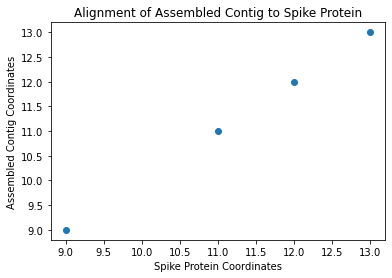

In [7]:
from Bio import pairwise2
import matplotlib.pyplot as plt
import csv
import sys
def read_sequences_from_fastq(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        while True:
            header = file.readline().strip()
            sequence = file.readline().strip()
            plus = file.readline().strip()
            quality = file.readline().strip()
            if not sequence:
                break
            sequences.append(sequence)
    return sequences

def get_kmer_count_from_sequence(sequence, k=3, cyclic=False):
    kmers = {}
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]
        else:
            if len(kmer) != k:
                continue
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1
    return kmers

def get_debruijn_edges_from_kmers(kmers):
    edges = {}
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                if k1[1:] == k2[:-1]:
                    edge = (k1[:-1], k2[:-1])
                    if edge in edges:
                        edges[edge] += 1  # Update edge multiplicity
                    else:
                        edges[edge] = 1
                if k1[:-1] == k2[1:]:
                    edge = (k2[:-1], k1[:-1])
                    if edge in edges:
                        edges[edge] += 1  # Update edge multiplicity
                    else:
                        edges[edge] = 1
    return edges

def trim_dead_ends(graph):
    # Find and remove nodes that have no out-edges (dead ends)
    dead_ends = [node for node in graph if not graph[node]]
    for node in dead_ends:
        del graph[node]
    return graph

def separate_contigs(graph):
    # Identify nodes with multiple out-edges (branching points)
    branching_points = [node for node in graph if len(graph[node]) > 1]
    contigs = []
    for point in branching_points:
        contig = []
        current = point
        while len(graph[current]) == 1:
            contig.append(current)
            next_node = graph[current][0]
            del graph[current]
            current = next_node
        contig.append(current)
        contigs.append(contig)
    return contigs

def find_eulerian_path(graph):
    def dfs(node):
        nonlocal circuit
        while graph[node]:
            neighbor = graph[node].pop()
            dfs(neighbor)
        circuit.append(node)

    start = list(graph.keys())[0]
    for node, edges in graph.items():
        if len(edges) > 0:
            start = node
            break

    circuit = []
    dfs(start)
    eulerian_path = circuit[::-1]
    return eulerian_path

def combine_kmers(sequences, k, cyclic=True):
    combined_kmers = {}
    for sequence in sequences:
        kmers = get_kmer_count_from_sequence(sequence, k, cyclic)
        for kmer, count in kmers.items():
            if kmer in combined_kmers:
                combined_kmers[kmer] += count
            else:
                combined_kmers[kmer] = count
    return combined_kmers

# Add a function for sequence alignment and plotting
def align_and_plot(assembled_genome, spike_protein_sequence):
    alignments = pairwise2.align.localms(assembled_genome, spike_protein_sequence, 2, -1, -0.5, -0.1)
    aligned_assembly = alignments[0][0]
    aligned_spike_protein = alignments[0][1]

    aligned_positions = []
    for i, (a, b) in enumerate(zip(aligned_assembly, aligned_spike_protein)):
        if a == b:
            aligned_positions.append((i, i))  # Store (assembly_coord, protein_coord)

    x = [pos[1] for pos in aligned_positions]
    y = [pos[0] for pos in aligned_positions]

    plt.scatter(x, y)
    plt.xlabel('Spike Protein Coordinates')
    plt.ylabel('Assembled Contig Coordinates')
    plt.title('Alignment of Assembled Contig to Spike Protein')
    plt.savefig('alignment_plot.png')  # Save as PNG file
    plt.show()


if __name__ == "__main__":
    file = 'output.fastq'
    sequences = read_sequences_from_fastq(file)

    all_kmers = combine_kmers(sequences, k=2, cyclic=False)
    print("K-mers:", all_kmers)

    edges = get_debruijn_edges_from_kmers(all_kmers)
    print("Edges:", edges)

    if edges:
        # Trimming dead-end nodes
        graph = {k: [] for k in set(sum(edges, ()))}
        for edge, count in edges.items():
            graph[edge[0]].append(edge[1])

        graph = trim_dead_ends(graph)
        print("Graph after trimming dead ends:", graph)

        # Separating contigs
        contigs = separate_contigs(graph)
        print("Contigs separated from branching points:", contigs)

        # Assembling genome from the Eulerian path
        eulerian_path = find_eulerian_path(graph)
        print("Eulerian Path:", eulerian_path)

        genome = ''.join([eulerian_path[i][0] for i in range(len(eulerian_path))])
        print("Assembled Genome:", genome)

        # Save the assembled genome to a file
        with open("assembled_genome.txt", "w") as output_file:
            output_file.write(genome)

        # Assuming you have the spike protein sequence stored in a variable
        spike_protein_sequence = "ACGT..."  # Replace with actual sequence

        # Align the assembled genome to the spike protein and plot
        align_and_plot(genome, spike_protein_sequence)
    else:
        print("No edges formed.")

In [6]:
import random
import toyplot
from Bio import pairwise2
import matplotlib.pyplot as plt
import csv
import sys



def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}
    
    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]
        
        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]
        
        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue
        
        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1
    
    return kmers




def get_debruijn_edges_from_kmers(kmers):
    edges = {}
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                if k1[1:] == k2[:-1]:
                    edge = (k1[:-1], k2[:-1])
                    if edge in edges:
                        edges[edge] += 1  # Update edge multiplicity
                    else:
                        edges[edge] = 1
                if k1[:-1] == k2[1:]:
                    edge = (k2[:-1], k1[:-1])
                    if edge in edges:
                        edges[edge] += 1  # Update edge multiplicity
                    else:
                        edges[edge] = 1
    return edges



def plot_debruijn_graph(edges, width=500, height=500):
    "returns a toyplot graph from an input of edges"
    white_background = {"background-color": "white"}
    graph = toyplot.graph(
        [i[0] for i in edges],
        [i[1] for i in edges],
        width=width,
        height=height,
        tmarker=">", 
        vsize=25,
        vstyle={"stroke": "blue", "stroke-width": .5 , "fill": "none"},
        vlstyle={"font-size": "11px"},
        estyle={"stroke": "orange", "stroke-width": 2},
        layout=toyplot.layout.FruchtermanReingold(edges=toyplot.layout.CurvedEdges())),
    style=white_background
    return graph


def read_sequences_from_fastq(file_path):
    sequences = []
    num = 0
    with open(file_path, 'r') as file:
        while True:
            header = file.readline().strip()
            sequence = file.readline().strip()
            plus = file.readline().strip()
            quality = file.readline().strip()
            if not sequence:
                break
            sequences.append(sequence)
            num += 1
    print(num)
    return sequences

def trim_dead_ends(graph):
    # Find and remove nodes that have no out-edges (dead ends)
    dead_ends = [node for node in graph if not graph[node]]
    for node in dead_ends:
        del graph[node]
    return graph

def separate_contigs(graph):
    # Identify nodes with multiple out-edges (branching points)
    branching_points = [node for node in graph if len(graph[node]) > 1]
    contigs = []
    for point in branching_points:
        contig = []
        current = point
        while len(graph[current]) == 1:
            contig.append(current)
            next_node = graph[current][0]
            del graph[current]
            current = next_node
        contig.append(current)
        contigs.append(contig)
    return contigs

def find_eulerian_path(graph):
    # Function to find an Eulerian path iteratively
    def iterative_dfs(start_node):
        stack = [start_node]
        path = []

        while stack:
            current_node = stack[-1]

            if graph[current_node]:
                next_node = graph[current_node].pop()
                stack.append(next_node)
            else:
                path.append(stack.pop())

        return path[::-1]

    start = list(graph.keys())[0]
    for node, edges in graph.items():
        if len(edges) > 0:
            start = node
            break

    eulerian_path = iterative_dfs(start)
    return eulerian_path


def align_and_plot(assembled_genome, spike_protein_sequence):
    alignments = pairwise2.align.localms(assembled_genome, spike_protein_sequence, 2, -1, -0.5, -0.1)
    aligned_assembly = alignments[0][0]
    aligned_spike_protein = alignments[0][1]

    aligned_positions = []
    for i, (a, b) in enumerate(zip(aligned_assembly, aligned_spike_protein)):
        if a == b:
            aligned_positions.append((i, i))  # Store (assembly_coord, protein_coord)

    x = [pos[1] for pos in aligned_positions]
    y = [pos[0] for pos in aligned_positions]

    # Assuming x and y contain coordinates of the dots
    plt.scatter(x, y)
    plt.plot(x, y, linestyle='-', color='red')  # Connect dots with a red line
    plt.xlabel('Protein Position')
    plt.ylabel('Assembled Genome Position')
    plt.title('Assembled Genome Alignment')
    plt.show()


sequence = ''.join(read_sequences_from_fastq("output.fastq"))
alignment_scores = {}  # Dictionary to store alignment scores for different k values

# Loop through different k values
for k_value in range(3, 7):  # Adjust the range as needed
    kmers = get_kmer_count_from_sequence(sequence, k=k_value, cyclic=False)
    edges = get_debruijn_edges_from_kmers(kmers)
    graph = {k: [] for k in set(sum(edges, ()))}
    for edge, count in edges.items():
        graph[edge[0]].append(edge[1])
    graph = trim_dead_ends(graph)
    eulerian_path = find_eulerian_path(graph)
    assembled_genome = ''.join([eulerian_path[i][0] for i in range(len(eulerian_path))])
    alignments = pairwise2.align.localms(assembled_genome, spike_protein_sequence, 2, -1, -0.5, -0.1)
    alignment_score = alignments[0][2]  # Get the alignment score
    alignment_scores[k_value] = alignment_score

# Plotting alignment scores against different k values and assembled genome alignment
plt.figure(figsize=(12, 5))

# Plotting alignment scores against different k values
plt.subplot(1, 2, 1)
plt.plot(list(alignment_scores.keys()), list(alignment_scores.values()), marker='o')
plt.xlabel('k values')
plt.ylabel('Alignment Scores')
plt.title('Alignment Scores for Different k values')
plt.grid(True)

# Plotting the assembled genome alignment
plt.subplot(1, 2, 2)
align_and_plot(genome, spike_protein_sequence)

plt.tight_layout()
plt.show()



sequence = ''.join(read_sequences_from_fastq("output.fastq"))
kmers = get_kmer_count_from_sequence(sequence, k=6, cyclic=False)
# print(kmers)

edges = get_debruijn_edges_from_kmers(kmers)
# print(edges)

graph = plot_debruijn_graph(edges, 1000, 1000)

print("Edges:", edges)
# Create the graph dictionary
graph = {k: [] for k in set(sum(edges, ()))}
for edge, count in edges.items():
    graph[edge[0]].append(edge[1])

graph = trim_dead_ends(graph)
print("Graph after trimming dead ends:", graph)

# Separating contigs
contigs = separate_contigs(graph)
print("Contigs separated from branching points:", contigs)

# Assembling genome from the Eulerian path
eulerian_path = find_eulerian_path(graph)
print("Eulerian Path:", eulerian_path)

genome = ''.join([eulerian_path[i][0] for i in range(len(eulerian_path))])
print("Assembled Genome:", genome)

# Save the assembled genome to a file
with open("assembled_genome.txt", "w") as output_file:
    output_file.write(genome)

# Assuming you have the spike protein sequence stored in a variable
spike_protein_sequence = "ACGT..."  # Replace with actual sequence

# Align the assembled genome to the spike protein and plot
align_and_plot(genome, spike_protein_sequence)
    
graph

5000


NameError: name 'spike_protein_sequence' is not defined

5000


NameError: name 'spike_protein_sequence' is not defined